# Week-6 Excercise -2

 By-

**Pratinav Seth 200968216**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Q1 Write down the meta information about the “cancer.csv” data set available in the UCI repository, https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

### Metadata

**Data Set Information:**

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)


Source:

Creators:

1. Dr. William H. Wolberg, General Surgery Dept.
University of Wisconsin, Clinical Sciences Center
Madison, WI 53792
wolberg '@' eagle.surgery.wisc.edu

2. W. Nick Street, Computer Sciences Dept.
University of Wisconsin, 1210 West Dayton St., Madison, WI 53706
street '@' cs.wisc.edu 608-262-6619

3. Olvi L. Mangasarian, Computer Sciences Dept.
University of Wisconsin, 1210 West Dayton St., Madison, WI 53706
olvi '@' cs.wisc.edu

Donor:

Nick Street

In [2]:
df = pd.read_csv("cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

### Q2 Tabulate and visualize the distribution of the numeric variables.

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df = df.drop(['Unnamed: 32','id'], axis =1)

In [6]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Since all are numeric we visualize all the attributes using a histogram and kdeplot.

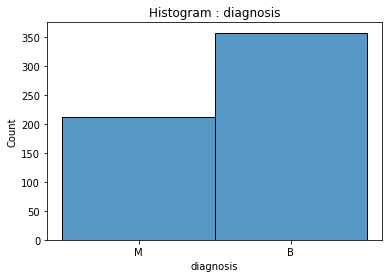

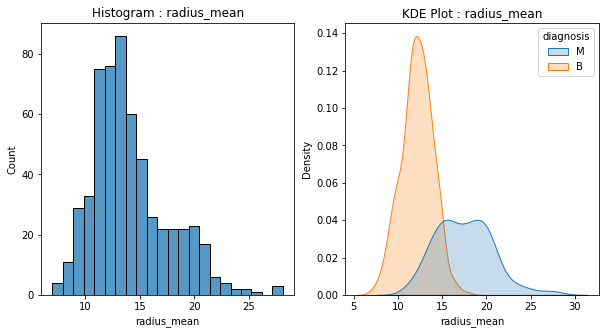

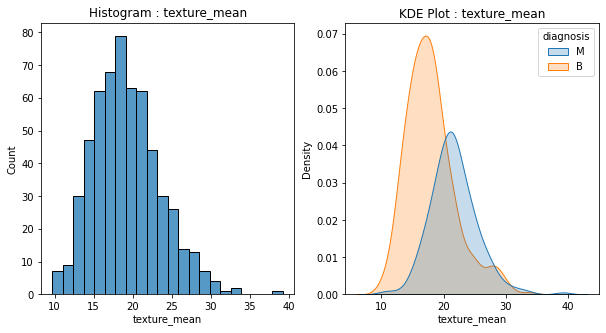

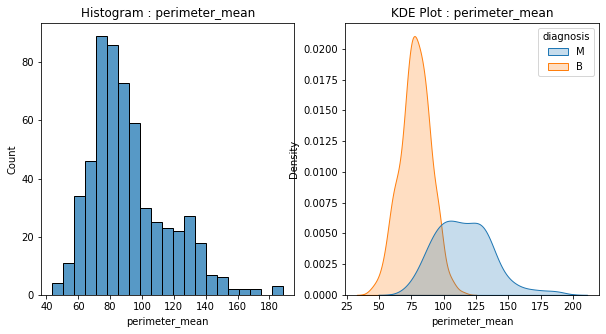

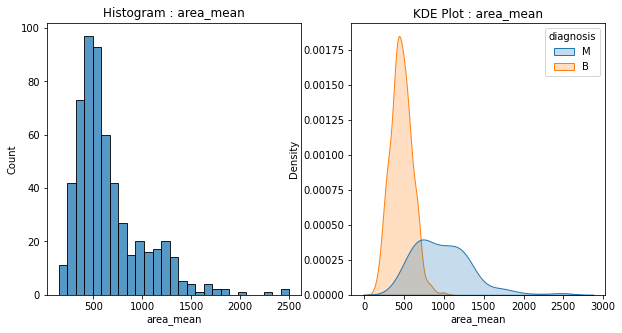

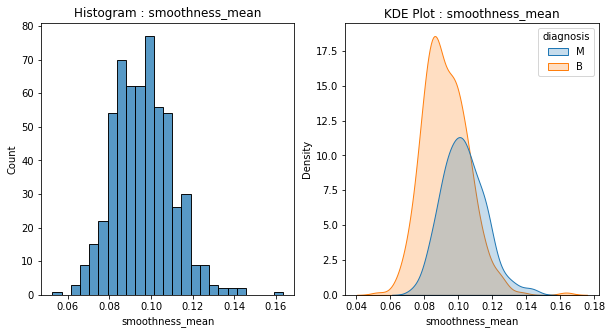

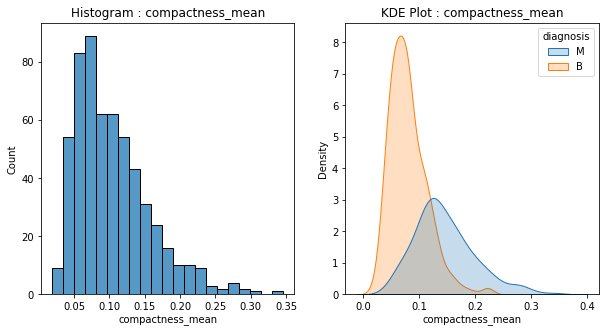

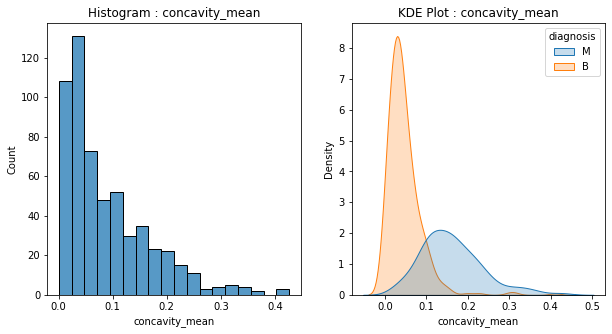

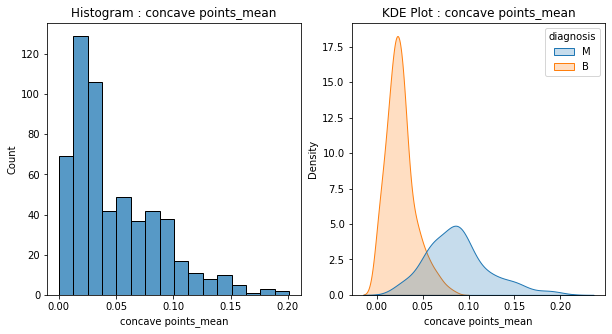

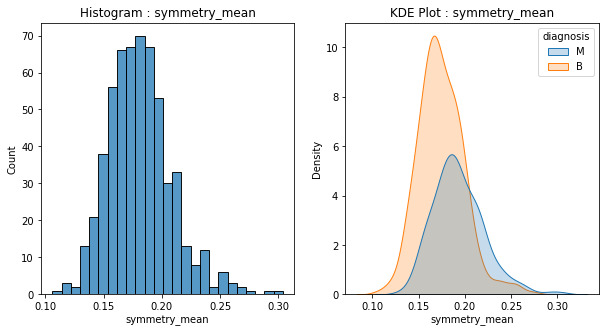

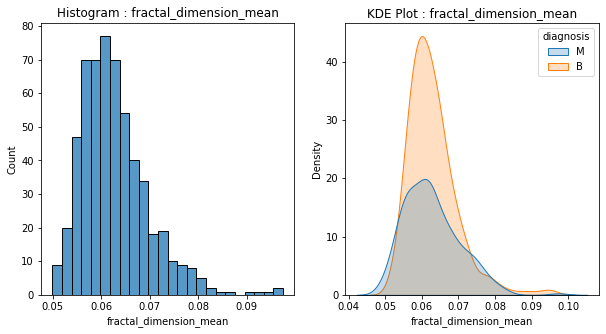

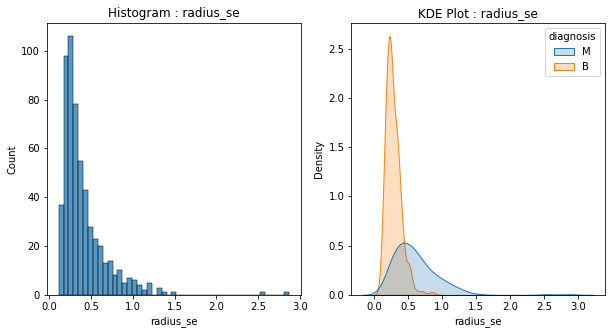

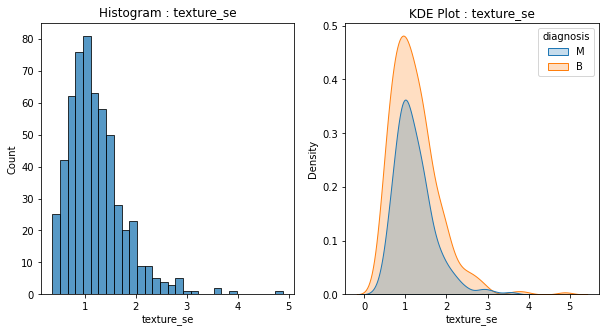

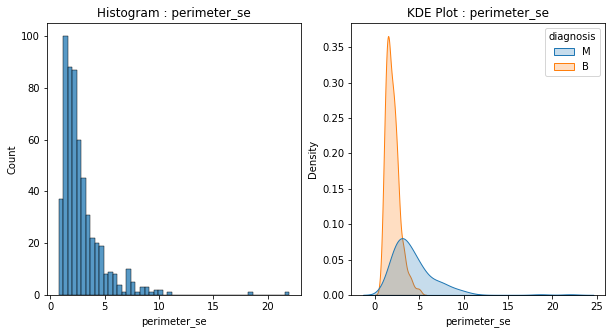

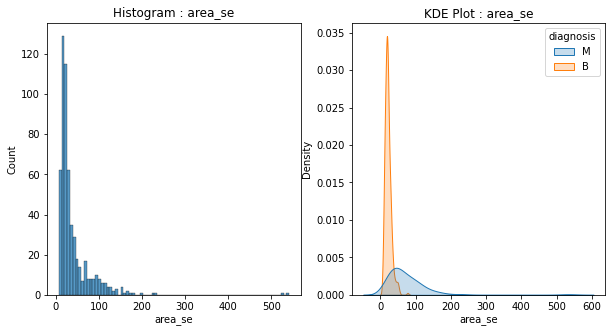

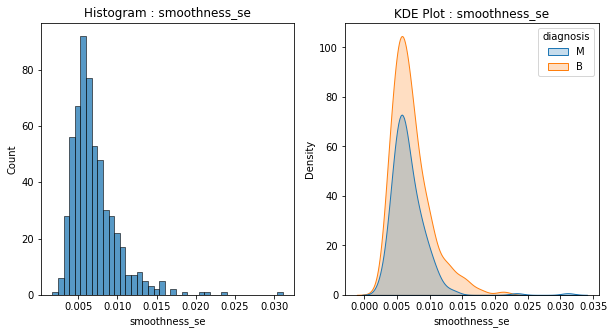

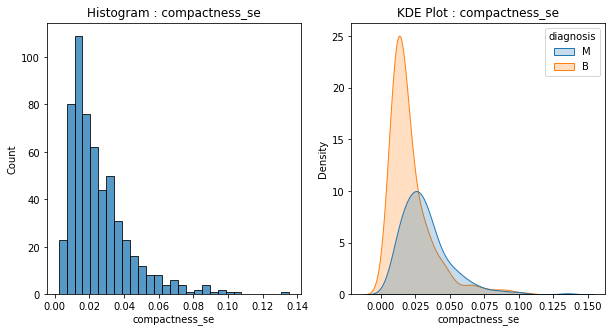

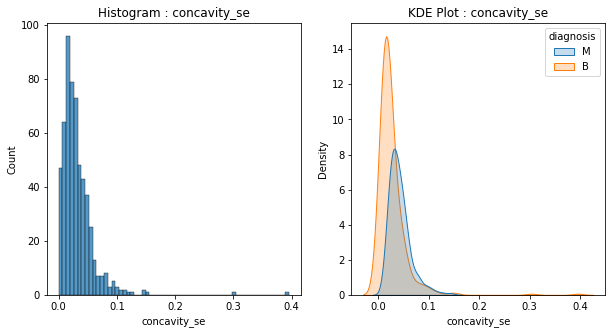

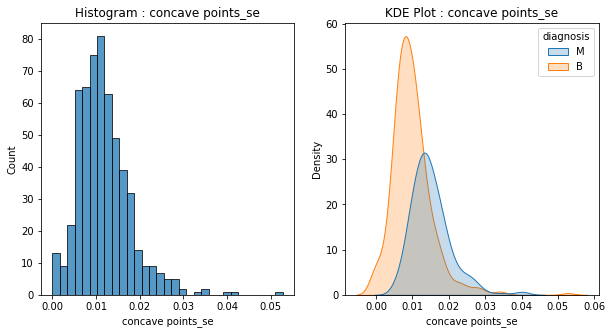

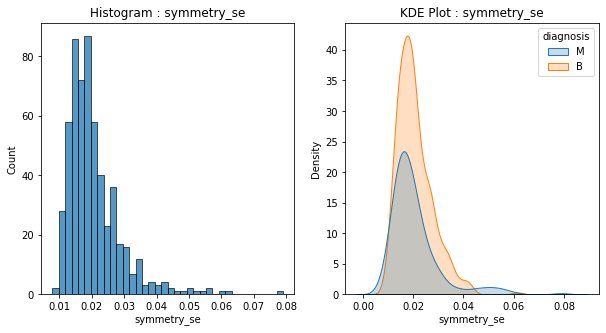

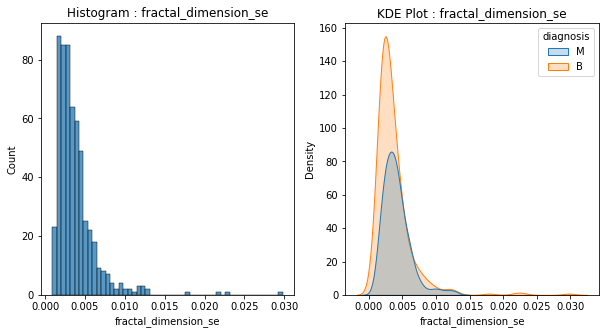

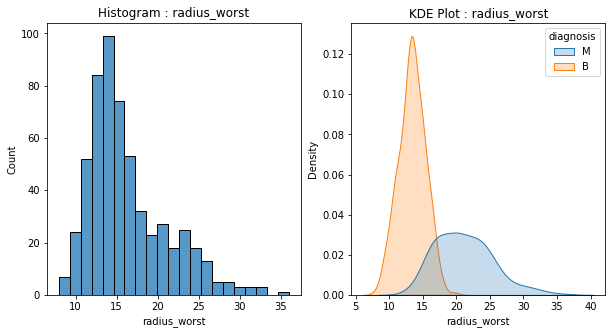

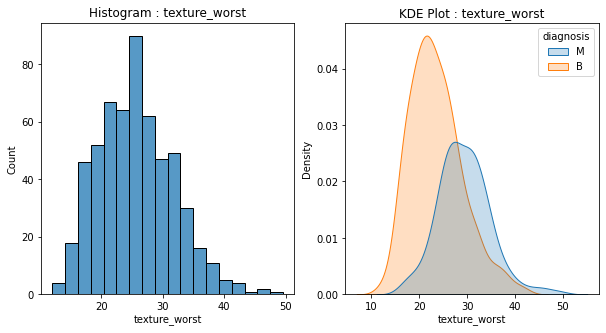

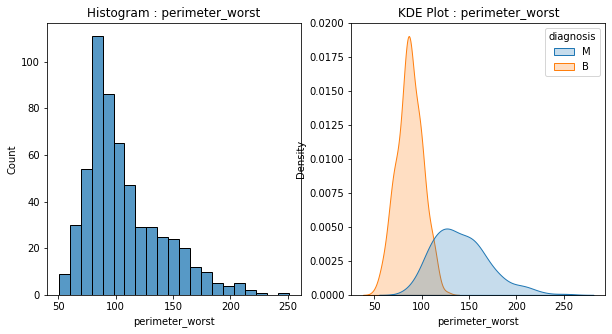

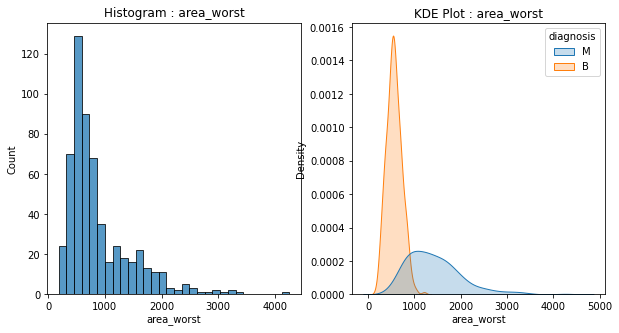

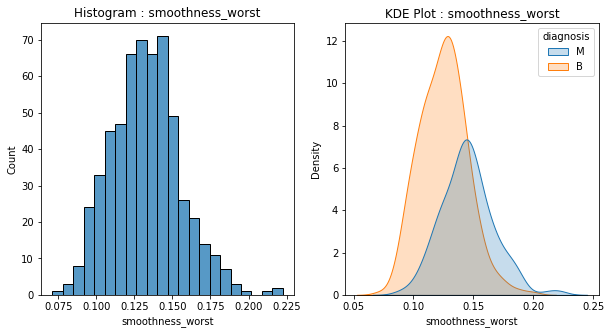

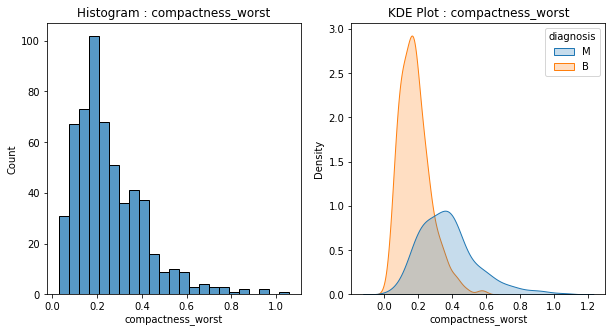

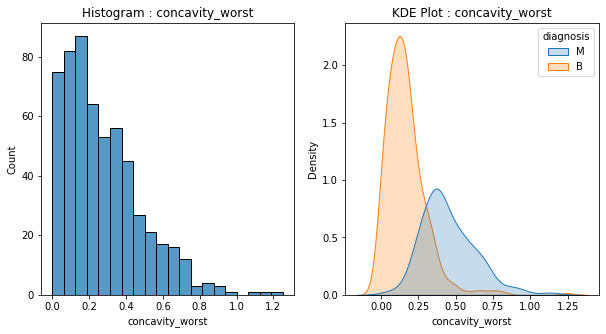

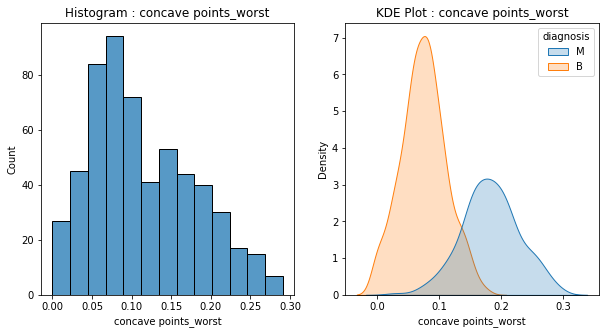

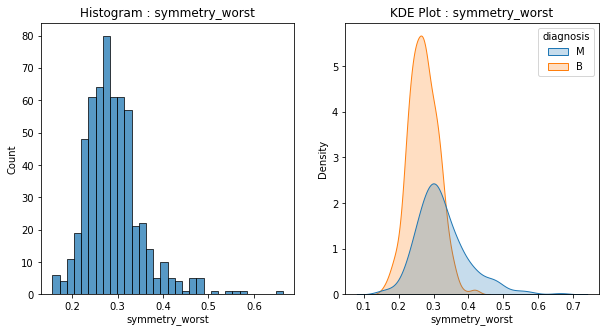

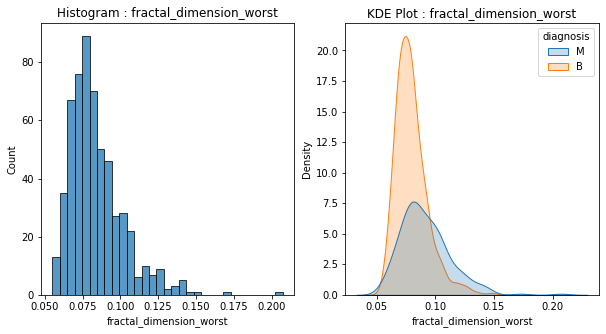

In [7]:
for column in df.columns:
    if column == 'diagnosis':
        plt.title("Histogram : "+column)
        sns.histplot(data=df, x=column)
        continue
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.title("Histogram : "+column)
    sns.histplot(data=df, x=column)
    plt.subplot(1, 2, 2)
    plt.title("KDE Plot : "+column)
    sns.kdeplot(data=df, x=column, hue = 'diagnosis', shade = True)
    plt.show()

### Q3 Perform the required preprocessing , 70,30 split and build a classifier using the SVM model available in SciKit Learn.


In [8]:
Y = df.diagnosis
X = df.drop('diagnosis', axis =1)

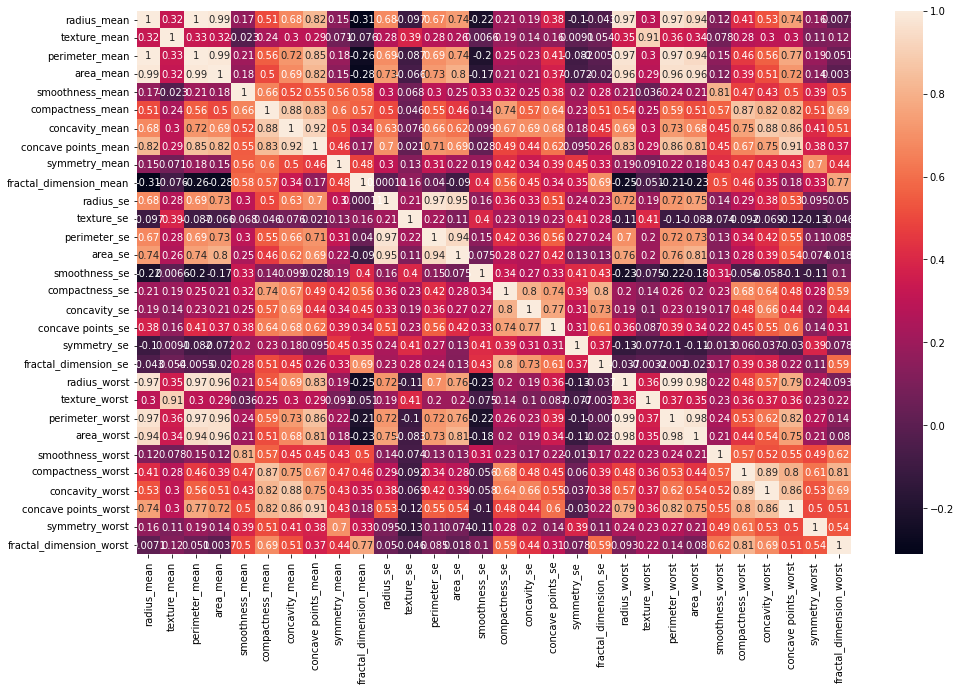

In [9]:
plt.figure(figsize=(16,10))
sns.heatmap(X.corr(), annot= True)
plt.show()

In [10]:
from sklearn.svm import SVC

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.3)

We do Standard Scaling to convert 

Standardization shifts the feature values to have a mean of zero, then maps them into a range such that they have a standard deviation of 1:

image.png


It centers the data, and it’s more flexible to new values that are not yet seen in the dataset. That’s why we prefer standardization in preprocessing of dataset.

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Building Standard SVM Model

In [13]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)

SVC(gamma='auto')

In [14]:
test_pred = model.predict(X_test)
cf_matrix = confusion_matrix(test_pred, Y_test)
print(cf_matrix)

[[106   2]
 [  2  61]]


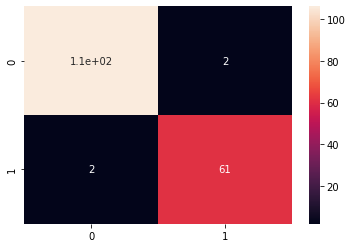

In [15]:
sns.heatmap(cf_matrix, annot = True)
plt.show()

In [16]:
print(f"Accuracy of the model on test set: {accuracy_score(test_pred, Y_test):.6f}")

Accuracy of the model on test set: 0.976608


### Q4 . Tune the hyperparameters of kernel (linear, polynomial, and radial basis), regularization and gamma. Tabulate the model performance and comment on the best model found for the given dataset.

In [17]:
clf_report = classification_report(Y_test, test_pred)
print(clf_report)

              precision    recall  f1-score   support

           B       0.98      0.98      0.98       108
           M       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [18]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.123,0.124, 0.125, 0.126, 0.127],
			'gamma': ['auto', 0.0000000000001, 0.000000000001, 0.00000000001],
			'kernel': ['rbf','linear', 'poly']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, Y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ...C=0.123, gamma=auto, kernel=rbf;, score=0.938 total time=   0.0s
[CV 2/5] END ...C=0.123, gamma=auto, kernel=rbf;, score=0.950 total time=   0.0s
[CV 3/5] END ...C=0.123, gamma=auto, kernel=rbf;, score=0.938 total time=   0.0s
[CV 4/5] END ...C=0.123, gamma=auto, kernel=rbf;, score=0.949 total time=   0.0s
[CV 5/5] END ...C=0.123, gamma=auto, kernel=rbf;, score=0.924 total time=   0.0s
[CV 1/5] END C=0.123, gamma=auto, kernel=linear;, score=0.975 total time=   0.0s
[CV 2/5] END C=0.123, gamma=auto, kernel=linear;, score=0.975 total time=   0.0s
[CV 3/5] END C=0.123, gamma=auto, kernel=linear;, score=0.988 total time=   0.0s
[CV 4/5] END C=0.123, gamma=auto, kernel=linear;, score=0.975 total time=   0.0s
[CV 5/5] END C=0.123, gamma=auto, kernel=linear;, score=0.962 total time=   0.0s
[CV 1/5] END ..C=0.123, gamma=auto, kernel=poly;, score=0.838 total time=   0.0s
[CV 2/5] END ..C=0.123, gamma=auto, kernel=poly

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.123, 0.124, 0.125, 0.126, 0.127],
                         'gamma': ['auto', 1e-13, 1e-12, 1e-11],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

In [19]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 0.123, 'gamma': 'auto', 'kernel': 'linear'}
SVC(C=0.123, gamma='auto', kernel='linear')


In [20]:
model = SVC(C=0.123, gamma='auto', kernel='linear')
model.fit(X_train, Y_train)

SVC(C=0.123, gamma='auto', kernel='linear')

In [21]:
test_pred = model.predict(X_test)

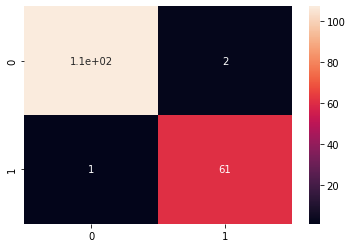

In [22]:
cf_matrix = confusion_matrix(test_pred, Y_test)
sns.heatmap(cf_matrix, annot = True)
plt.show()

In [23]:
print(f"Accuracy of the model on test set: {accuracy_score(test_pred, Y_test):.6f}")

Accuracy of the model on test set: 0.982456


In [24]:
clf_report = classification_report(Y_test, test_pred)
print(clf_report)

              precision    recall  f1-score   support

           B       0.98      0.99      0.99       108
           M       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



The best model found by GRID Search has F1 Score of 0.98 while normal SVM model has same f1 score 0.98 but worse classwise f1 scores and macro avg score.Along with that best model has accuracy 0.98xx > default models 0.97xx.

Thus gridsearch model is slightly more efficient than default SVM model.
